In [57]:
from Bio import pairwise2
from itertools import product
import pandas as pd 
import numpy as np
import os 
from polyleven import levenshtein
from collections import Counter

In [166]:
#Levenshtein distance
def leven(Z):
    X,Y = iter(Z)
    scr = levenshtein(X, Y)
    distance = 1
    return 1 if scr <= distance else 0

### 1) Create a distance matrix (where 1, if levenshtein dictance <=1)

#### Top 1000 of clones

In [167]:
AB_clones = pd.read_csv("AB_FMBA_features/covid_status_top.txt", sep = '\t')
AB_clones_1000 = list(AB_clones.cdr3aa)[:1000]
len(AB_clones_1000)

1000

In [168]:
FMBA_clones = pd.read_csv("AB_FMBA_features/COVID_status_TRB_fmba_full_v2_pv.txt", sep = '\t')
FMBA_clones_1000 = list(FMBA_clones.cdr3aa)[:1000]
len(FMBA_clones_1000)

1000

In [169]:
comb = list(product(AB_clones_1000, FMBA_clones_1000))
print("lenght of array:", len(comb))
lev = list(map(leven, comb))
print('unique values:', set(lev))
mm = np.array(lev)
mm.shape = (1000, 1000)
AB_vs_FMBA_leven = pd.DataFrame(np.array(mm), index=AB_clones_1000, columns=FMBA_clones_1000)

AB_vs_FMBA_leven.to_csv("AB_vs_FMBA_leven_flat_dataframe_top1000.tsv", sep = '\t')

lenght of array: 1000000
unique values: {0, 1}


In [172]:
sum_occurrence_FMBA = np.apply_along_axis(sum, 0, mm)
edge_count_FMBA = [x for x in sum_occurrence_FMBA if x != 0]
print(len(edge_count_FMBA))
Counter(edge_count_FMBA)

29


Counter({1: 23, 8: 1, 2: 1, 7: 2, 4: 1, 9: 1})

In [174]:
sum_occurrence_AB = np.apply_along_axis(sum, 1, mm)
edge_count_AB = [x for x in sum_occurrence_AB if x != 0]
print(len(edge_count_AB))
Counter(edge_count_AB)

54


Counter({2: 4, 1: 49, 3: 1})

In [38]:
#not too many
print('total:', sum([54, 29]))

total: 83


#### Top 5000 of clones

In [375]:
#Let's take all of the COVID-associated clones with p-value < 0.05
print('lenght AB_clones:', len(AB_clones))
print('lenght FMBA_clones:', len(FMBA_clones))

AB_clones_5000 = list(AB_clones.cdr3aa)[:5000]
FMBA_clones_5000 = list(FMBA_clones.cdr3aa)[:5000]
len(AB_clones_5000)

lenght AB_clones: 20212
lenght FMBA_clones: 5190


5000

In [376]:
#Repeat step 1

comb = list(product(AB_clones_5000, FMBA_clones_5000))
print("lenght of array:", len(comb))
lev = list(map(leven, comb))
print('unique values:', set(lev))
mm = np.array(lev)
mm.shape = (5000, 5000)
AB_vs_FMBA_leven = pd.DataFrame(np.array(mm), index=AB_clones_5000, columns=FMBA_clones_5000)

AB_vs_FMBA_leven.to_csv("AB_vs_FMBA_leven_flat_dataframe_top5000.tsv", sep = '\t')

lenght of array: 25000000
unique values: {0, 1}


### 2) Find sequences that form clusters

#### Incidence of FMBA features

In [75]:
sum_occurrence_FMBA = np.apply_along_axis(sum, 0, mm)
edge_count_FMBA = [x for x in sum_occurrence_FMBA if x != 0]
len(edge_count_FMBA)

1101

In [78]:
Counter(edge_count_FMBA)

Counter({1: 697,
         2: 194,
         3: 68,
         5: 13,
         31: 1,
         6: 8,
         4: 30,
         16: 7,
         12: 6,
         23: 1,
         26: 2,
         8: 4,
         10: 7,
         19: 4,
         7: 6,
         25: 3,
         15: 8,
         18: 6,
         13: 7,
         21: 3,
         24: 3,
         9: 6,
         30: 1,
         17: 4,
         14: 5,
         27: 2,
         33: 2,
         11: 2,
         28: 1})

In [95]:
df_sum_occurrence_FMBA = pd.DataFrame.from_dict({'cdr3aa': FMBA_clones_5000, 'incidence': sum_occurrence_FMBA})
df_sum_occurrence_FMBA.shape

(5000, 2)

In [232]:
df_sum_occurrence_FMBA = df_sum_occurrence_FMBA.loc[df_sum_occurrence_FMBA['incidence']>=2]
df_sum_occurrence_FMBA = df_sum_occurrence_FMBA.set_index('cdr3aa')
len(df_sum_occurrence_FMBA)

404

#### Incidence of Adaptive features

In [76]:
sum_occurrence_AB = np.apply_along_axis(sum, 1, mm)
edge_count_AB = [x for x in sum_occurrence_AB if x != 0]
len(edge_count_AB)

1703

In [77]:
Counter(edge_count_AB)

Counter({1: 993, 2: 426, 5: 22, 4: 72, 3: 153, 7: 14, 6: 18, 8: 4, 13: 1})

In [98]:
df_sum_occurrence_AB = pd.DataFrame.from_dict({'cdr3aa': AB_clones_5000, 'incidence': sum_occurrence_AB})
df_sum_occurrence_AB.shape

(5000, 2)

In [229]:
df_sum_occurrence_AB = df_sum_occurrence_AB.loc[df_sum_occurrence_AB['incidence']>=2]
df_sum_occurrence_AB = df_sum_occurrence_AB.set_index('cdr3aa')
len(df_sum_occurrence_AB)

710

In [230]:
#Drop common clones from df_sum_occurrence_AB
common_clones = set(AB_clones_5000) & set(FMBA_clones_5000)
df_sum_occurrence_AB=df_sum_occurrence_AB.loc[set(df_sum_occurrence_AB.index.values)-common_clones,]
len(df_sum_occurrence_AB)

677

In [240]:
len(common_clones)

38

In [235]:
#concat two dataframes
incidence_of_features_AB_vs_FMBA = pd.concat([df_sum_occurrence_FMBA, df_sum_occurrence_AB])
len(incidence_of_features_AB_vs_FMBA)

1081

In [254]:
incidence_of_features_AB_vs_FMBA_sorted = incidence_of_features_AB_vs_FMBA.sort_values('incidence', kind='mergesort',  ascending=False)
incidence_of_features_AB_vs_FMBA_sorted.to_csv("incidence_of_features_AB_vs_FMBA_sorted.tsv", sep = '\t')
top1000 = incidence_of_features_AB_vs_FMBA_sorted.index.values[:1000]
    

In [253]:
len(set(top1000) & set(df_sum_occurrence_AB.index.values))

596

### 3) Let's create a Graph

In [379]:
##Graph for top 5000 of clones
#Delete rows and columns that contained only zeros
AB_vs_FMBA_leven = pd.read_csv("AB_vs_FMBA_leven_flat_dataframe_top5000.tsv", sep = '\t', index_col=0)
AB_vs_FMBA_leven_without_zeros = AB_vs_FMBA_leven.loc[:, (AB_vs_FMBA_leven != 0).any(axis=0)]
AB_vs_FMBA_leven_without_zeros = AB_vs_FMBA_leven_without_zeros.loc[(AB_vs_FMBA_leven_without_zeros != 0).any(axis=1),:]
print(AB_vs_FMBA_leven_without_zeros.shape)
AB_vs_FMBA_leven_without_zeros = AB_vs_FMBA_leven_without_zeros.iloc[:1000,:1000]
AB_vs_FMBA_leven_without_zeros.shape


(1703, 1101)


(1000, 1000)

In [144]:
import networkx as nx
import matplotlib.pyplot as plt

#### Draw a Graph

In [381]:
G = nx.Graph(AB_vs_FMBA_leven_without_zeros.values)

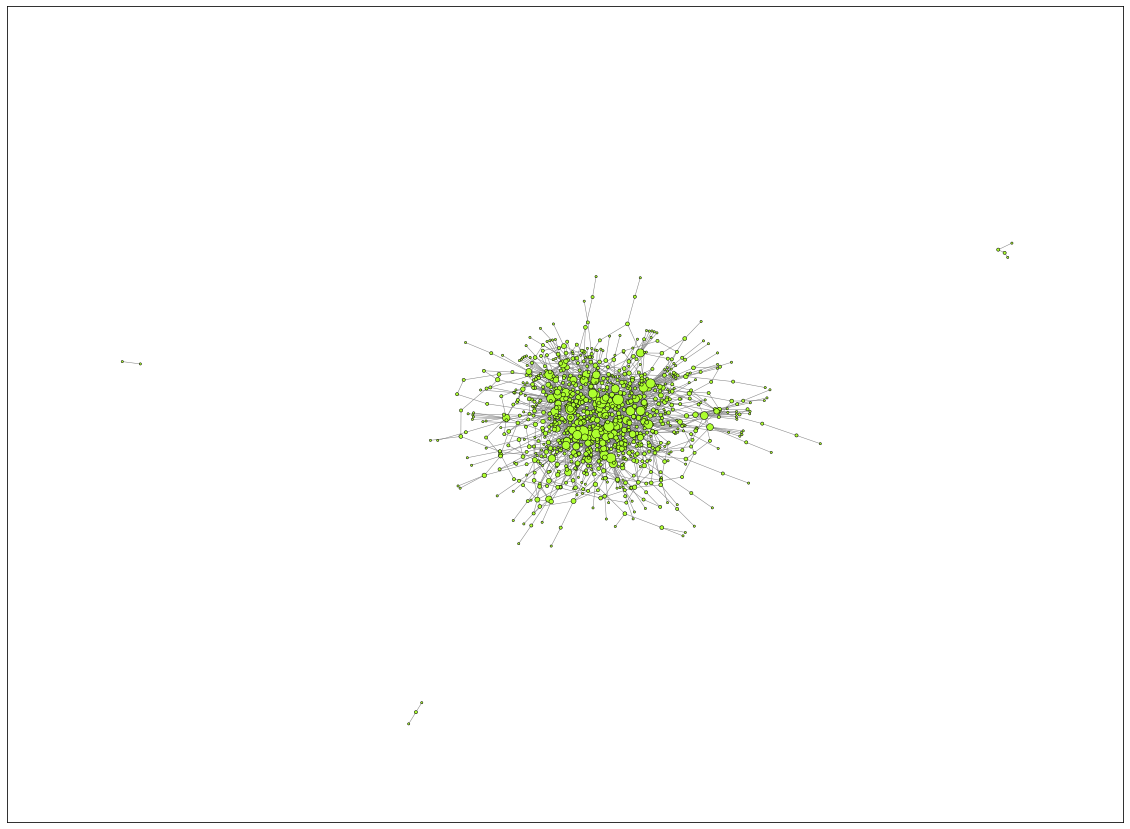

In [382]:
pos = nx.spring_layout(G)
#labels = {c: cln_lst1[c] for c in range(len(cln_lst1))}
plt.figure(10,figsize=(20,15)) 
d = dict(G.degree)
nx.draw_networkx_nodes(G,pos, node_color='greenyellow', node_size=[v * 5 for v in d.values()], linewidths=0.5, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray')
plt.show()

In [162]:
#Graph for top 1000 of clones
AB_vs_FMBA_leven = pd.read_csv("AB_vs_FMBA_leven_flat_dataframe_top1000.tsv", sep = '\t', index_col=0)

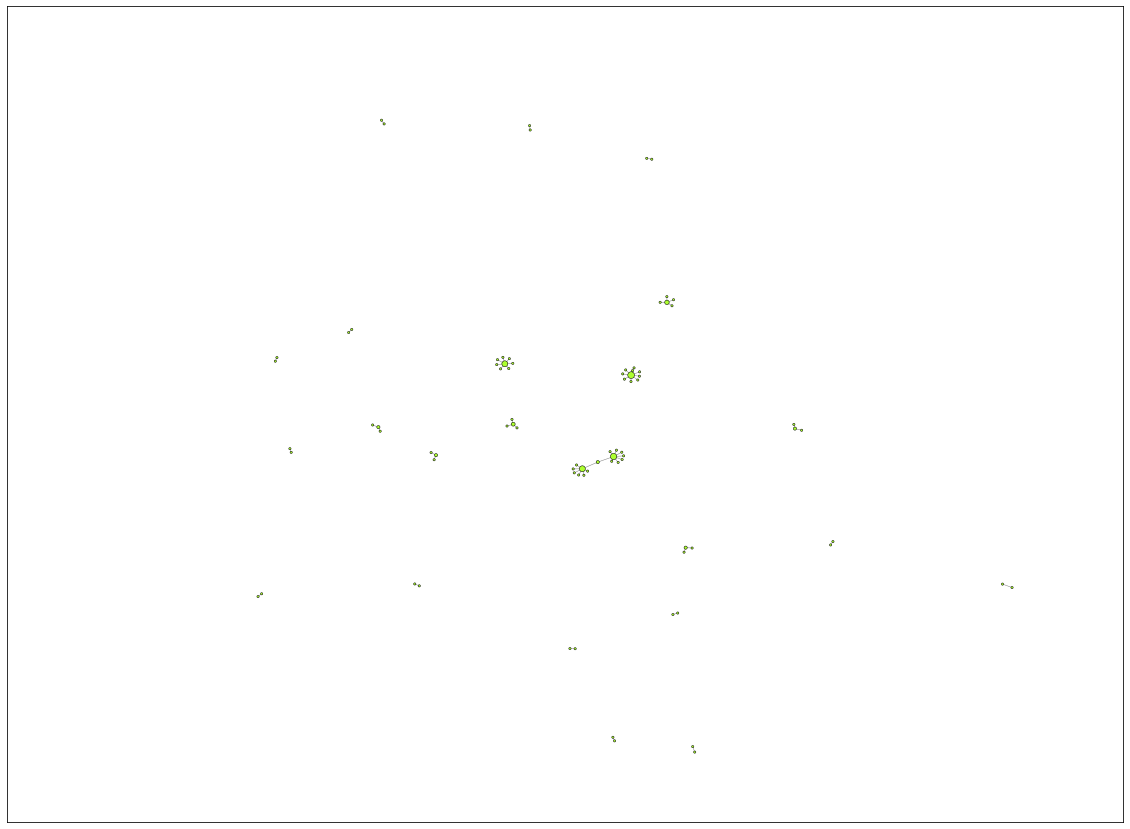

In [163]:
G = nx.Graph(AB_vs_FMBA_leven.values)
pos = nx.spring_layout(G)
#labels = {c: cln_lst1[c] for c in range(len(cln_lst1))}
plt.figure(10,figsize=(20,15)) 
d = dict(G.degree)
nx.draw_networkx_nodes(G,pos, node_color='greenyellow', node_size=[v * 5 for v in d.values()], linewidths=0.5, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray')
plt.show()

### 3) Coloring by V, J segments

In [286]:
incidence_of_features_AB_vs_FMBA_sorted = pd.read_csv("incidence_of_features_AB_vs_FMBA_sorted.tsv", sep = '\t', index_col=0)
mix_accosiated_clones=list(incidence_of_features_AB_vs_FMBA_sorted.index.values) 
mix_accosiated_clones_without_bed_clones=[x for x in mix_accosiated_clones if '_' not in x]
mix_accosiated_clones_without_bed_clones=mix_accosiated_clones_without_bed_clones[:1000]

In [269]:
pool_AB=pd.read_csv("/projects/fmba_covid/adaptive_new/pool/pool.aa.table.20+.txt", sep = '\t') 
pool_FMBA=pd.read_csv("/projects/fmba_covid/fmba_new/pool/TRB.pool.aa.table.txt", sep = '\t') 

In [272]:
pool_AB_FMBA=pd.concat([pool_AB, pool_FMBA], axis=0)

In [318]:
dct_pool_AB_FMBA_v=dict(zip(list(pool_AB_FMBA.cdr3aa), list(pool_AB_FMBA.v)))
dct_pool_AB_FMBA_j=dict(zip(list(pool_AB_FMBA.cdr3aa), list(pool_AB_FMBA.j)))

In [322]:
#Dict from mix_accosiated_clones and V, J segments
dct_accosiated_clones_v = {x:dct_pool_AB_FMBA_v[x] for x in mix_accosiated_clones_without_bed_clones}
dct_accosiated_clones_j = {x:dct_pool_AB_FMBA_j[x] for x in mix_accosiated_clones_without_bed_clones}

In [400]:
v_segments=dict(Counter(list(dct_accosiated_clones_v.values())))
print('V:', v_segments)
print('Number of V:', len(v_segments))
v_segments=Counter(list(dct_accosiated_clones_v.values())).most_common()[:10]
print('\nSorting:\n', v_segments)
v_segments=[i[0] for i in v_segments]

j_segments=dict(Counter(list(dct_accosiated_clones_j.values())))
print('\nJ:', j_segments)
print('Number of J:', len(j_segments))
j_segments=Counter(list(dct_accosiated_clones_j.values())).most_common()
print('\nSorting:\n', j_segments)
j_segments=[i[0] for i in j_segments]

V: {'TRBV12-3': 133, 'TRBV10-1': 13, 'TRBV7-3': 18, 'TRBV27': 57, 'TRBV5-6': 25, 'TRBV5-1': 108, 'TRBV7-9': 35, 'TRBV6-5': 90, 'TRBV7-6': 35, 'TRBV5-5': 16, 'TRBV14': 19, 'TRBV5-4': 19, 'TRBV5-8': 9, 'TRBV28': 85, 'TRBV12-4': 7, 'TRBV7-8': 14, 'TRBV7-2': 25, 'TRBV18': 27, 'TRBV6-6': 32, 'TRBV3-1': 8, 'TRBV25-1': 5, 'TRBV2': 13, 'TRBV10-2': 8, 'TRBV6-1': 50, 'TRBV9': 28, 'TRBV23-1': 3, 'TRBV19': 20, 'TRBV6-4': 11, 'TRBV4-3': 7, 'TRBV11-2': 17, 'TRBV6-2': 18, 'TRBV4-2': 14, 'TRBV13': 8, 'TRBV11-1': 3, 'TRBV11-3': 5, 'TRBV7-7': 4, 'TRBV4-1': 4, 'TRBV5-7': 1, 'TRBV20-1': 2, 'TRBV21-1': 2, 'TRBV3-2': 1, 'TRBV15': 1}
Number of V: 42

Sorting:
 [('TRBV12-3', 133), ('TRBV5-1', 108), ('TRBV6-5', 90), ('TRBV28', 85), ('TRBV27', 57), ('TRBV6-1', 50), ('TRBV7-9', 35), ('TRBV7-6', 35), ('TRBV6-6', 32), ('TRBV9', 28)]

J: {'TRBJ1-6': 411, 'TRBJ2-3': 32, 'TRBJ1-3': 147, 'TRBJ2-1': 24, 'TRBJ1-5': 71, 'TRBJ1-1': 65, 'TRBJ1-2': 170, 'TRBJ2-5': 8, 'TRBJ1-4': 29, 'TRBJ2-2': 43}
Number of J: 10

Sorting:
 

In [401]:
v_segments_dct = {v:[] for v in v_segments}
j_segments_dct = {j:[] for j in j_segments}

In [402]:
def create_segment_dict(clone_dct, segm_dct):
    for segm in segm_dct.keys():
        clone_lst=[]      
        for k, v in clone_dct.items():
            if v==segm:
                clone_lst.append(k)
        segm_dct.update({segm: clone_lst}) 
    return segm_dct

In [403]:
v_segments_dct=create_segment_dict(dct_accosiated_clones_v, v_segments_dct)
j_segments_dct=create_segment_dict(dct_accosiated_clones_j, j_segments_dct)

In [404]:
#let's do palette for v segments and j segments 
color_map={c : 'lavender' for c in range(1000)}
colors=['darkorchid', 'gold', 'lime', 'slateblue', 'cyan', 'plum', 'palegreen', 'salmon', 'yellow', 'olive']
palette_v=dict(zip(v_segments, colors))
palette_j=dict(zip(j_segments, colors))

labels = {c: mix_accosiated_clones_without_bed_clones[c] for c in range(len(mix_accosiated_clones_without_bed_clones))}

#### Coloring by V segment

In [405]:
for num, seq in labels.items():
    for k in v_segments_dct.keys():  
            if seq in v_segments_dct.get(k):
                color_map.update({num: palette_v.get(k)})

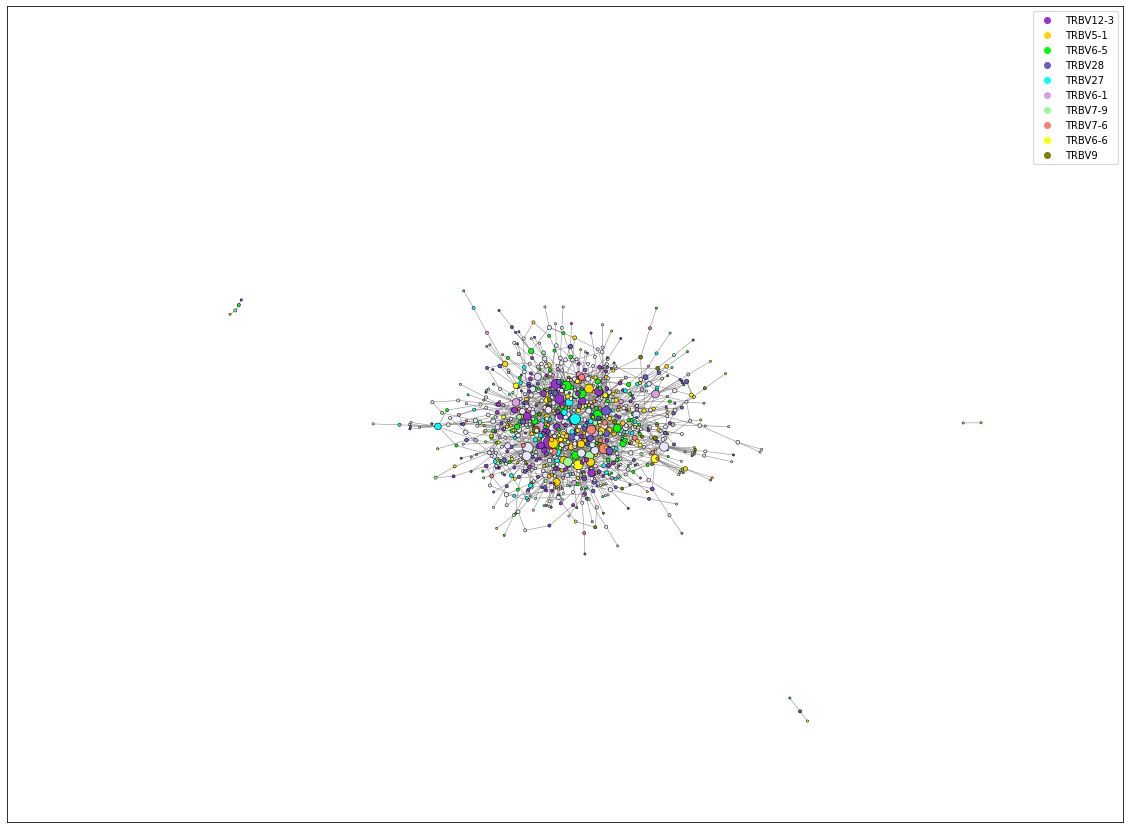

In [406]:
G = nx.Graph(AB_vs_FMBA_leven_without_zeros.values)

pos = nx.fruchterman_reingold_layout(G)
plt.figure(10,figsize=(20,15)) 
d=dict(G.degree)
nx.draw_networkx_nodes(G,pos, node_color=list(color_map.values()), node_size=[v * 5 for v in d.values()], linewidths=0.5, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in palette_v.values()]
plt.legend(markers, palette_v.keys(), numpoints=1)
plt.show()

#### Coloring by J segment

In [407]:
for num, seq in labels.items():
    for k in j_segments_dct.keys():  
            if seq in j_segments_dct.get(k):
                color_map.update({num: palette_j.get(k)})

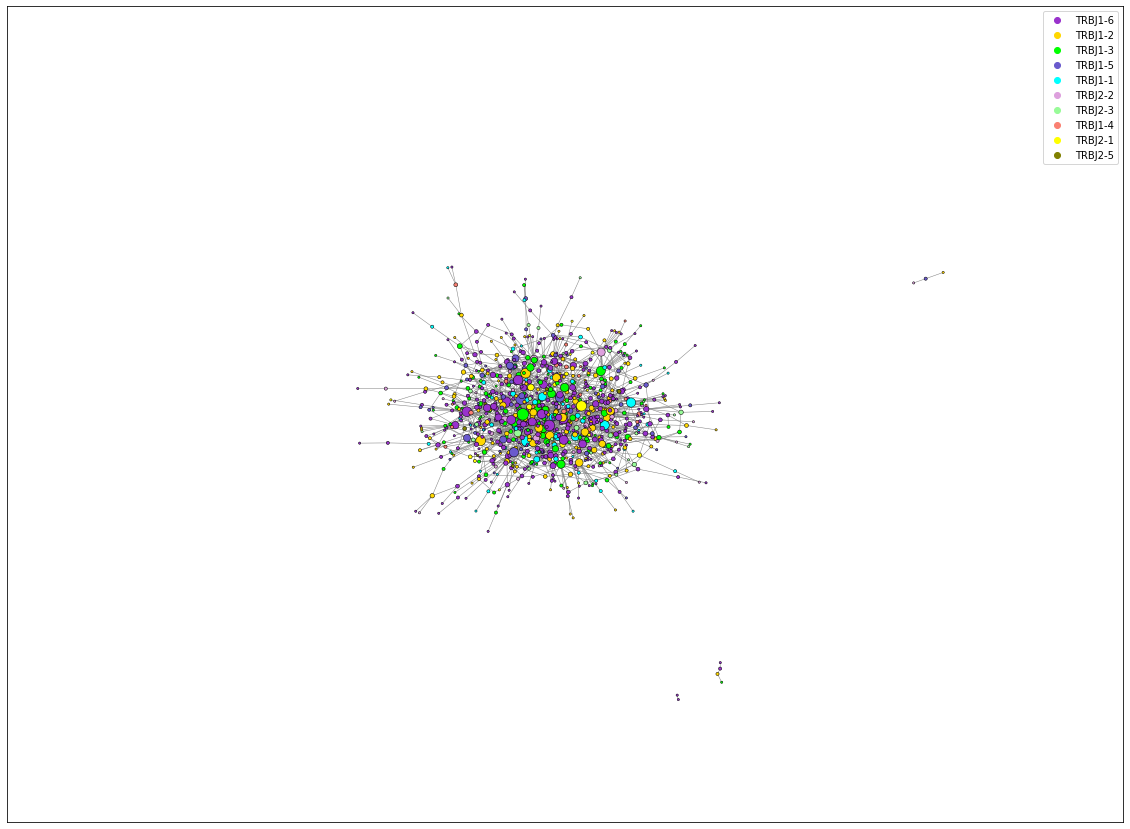

In [408]:
G = nx.Graph(AB_vs_FMBA_leven_without_zeros.values)

pos = nx.fruchterman_reingold_layout(G)
plt.figure(10,figsize=(20,15)) 
d=dict(G.degree)
nx.draw_networkx_nodes(G,pos, node_color=list(color_map.values()), node_size=[v * 5 for v in d.values()], linewidths=0.5, edgecolors='black')
nx.draw_networkx_edges(G, pos, width=0.5, edge_color='gray')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in palette_j.values()]
plt.legend(markers, palette_j.keys(), numpoints=1)
plt.show()